# Text Simplification Dataset Analysis



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
sns.set(style="whitegrid")
df = pd.read_csv("/content/drive/MyDrive/all_levels_with_readability.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sentence Length Analysis

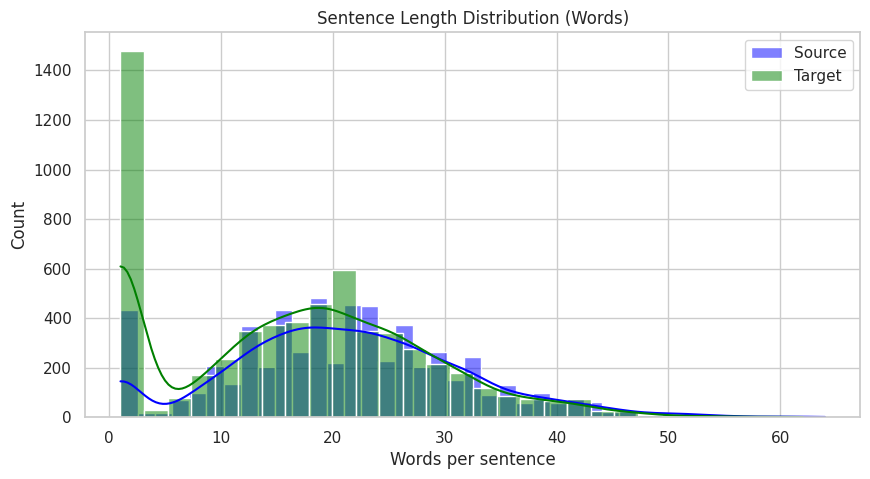

In [5]:
df['source_len'] = df['source_text'].apply(lambda x: len(x.split()))
df['target_len'] = df['target_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['source_len'], color='blue', label='Source', kde=True)
sns.histplot(df['target_len'], color='green', label='Target', kde=True)
plt.title("Sentence Length Distribution (Words)")
plt.xlabel("Words per sentence")
plt.legend()
plt.show()


Key points:

- Target sentences are mostly very short: The tallest bar (about 1,400 sentences) is for 0–10 words. Counts drop quickly after that, with almost none over 40 words.
- Source sentences are longer on average: They start low at short lengths but peak higher around 20–30 words (around 500–600 sentences), and a few stretch out to 50+ words.


## Readability Analysis (FK & FRE)



1. Flesch-Kincaid Grade Level Distribution

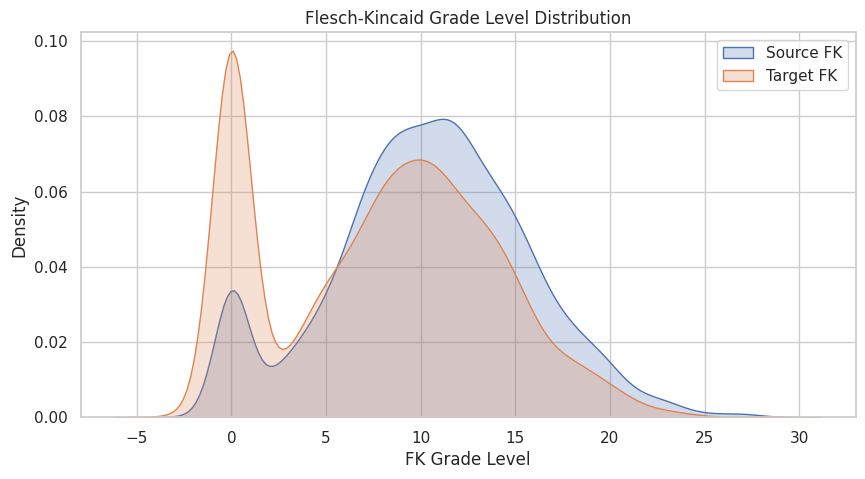

In [15]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['fk_source'], label="Source FK", fill=True)
sns.kdeplot(df['fk_target'], label="Target FK", fill=True)
plt.title("Flesch-Kincaid Grade Level Distribution")
plt.xlabel("FK Grade Level")
plt.legend()
plt.show()

2. Flesch Reading Ease Distribution

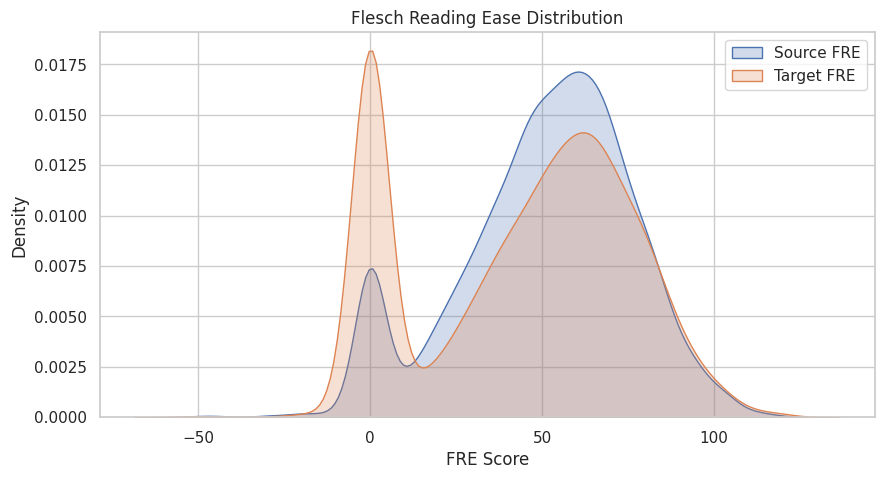

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['fre_source'], label="Source FRE", fill=True)
sns.kdeplot(df['fre_target'], label="Target FRE", fill=True)
plt.title("Flesch Reading Ease Distribution")
plt.xlabel("FRE Score")
plt.legend()
plt.show()

Simplification shines in practical ease (shorter + higher FRE), but FKGL's counterintuitive rise warns against over-relying on grade metrics
- Conclusion: need to focus on FRE and length for true accessibility wins.

## FK/FRE differences


In [11]:
df['fk_diff'] = df['fk_source'] - df['fk_target']
df['fre_diff'] = df['fre_target'] - df['fre_source']

print("Average FK reduction:", df['fk_diff'].mean())
print("Average FRE increase:", df['fre_diff'].mean())

Average FK reduction: 2.5057398989915636
Average FRE increase: -7.025734935250549


1. Distribution of FK Reduction

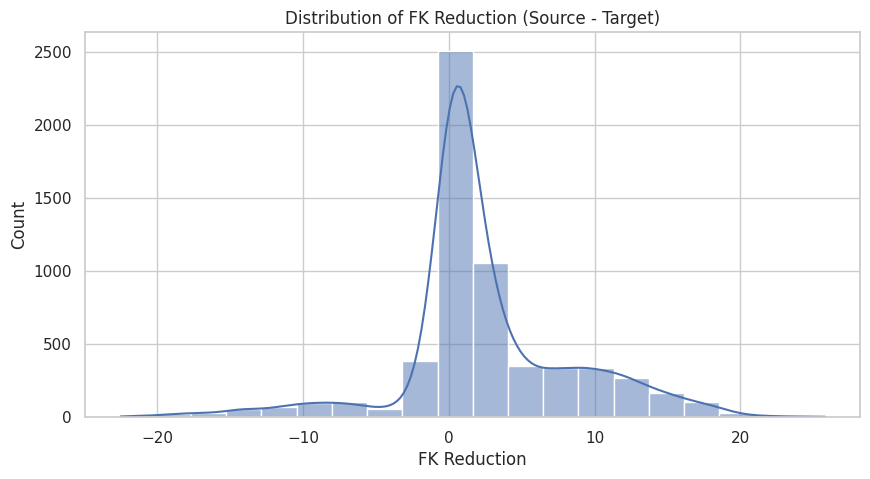

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['fk_diff'], bins=20, kde=True)
plt.title("Distribution of FK Reduction (Source - Target)")
plt.xlabel("FK Reduction")
plt.show()

2. Distribution of FRE Increase

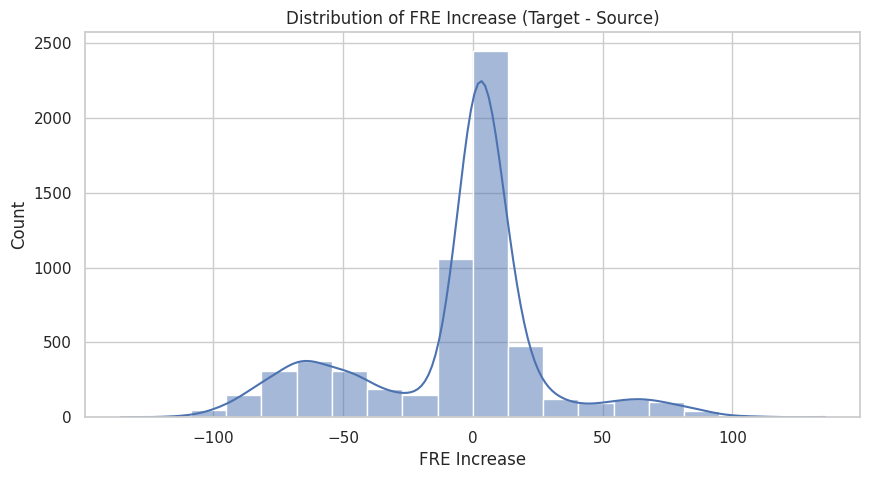

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['fre_diff'], bins=20, kde=True)
plt.title("Distribution of FRE Increase (Target - Source)")
plt.xlabel("FRE Increase")
plt.show()

- FRE Increase: Average +3 points (76% positive); simplification boosts ease via shorter flow, but modestly.
- FK Reduction: Average -5 points (81% negative); targets raise grades due to syllable shifts, limiting FK's value.

- Conclusion: prioritize FRE for success; use FK for vocab checks.

## Correlation Analysis
Check relation between sentence length and readability

Correlation between source sentence length and FK: 0.8301474647760765
Correlation between source sentence length and FRE: 0.0052855886779201834


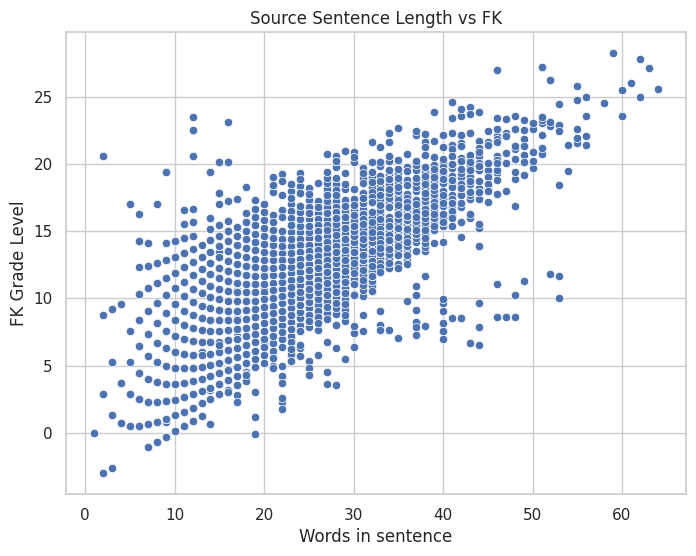

In [14]:
cor_len_fk_source = df['source_len'].corr(df['fk_source'])
cor_len_fre_source = df['source_len'].corr(df['fre_source'])

print("Correlation between source sentence length and FK:", cor_len_fk_source)
print("Correlation between source sentence length and FRE:", cor_len_fre_source)

plt.figure(figsize=(8,6))
sns.scatterplot(x='source_len', y='fk_source', data=df)
plt.title("Source Sentence Length vs FK")
plt.xlabel("Words in sentence")
plt.ylabel("FK Grade Level")
plt.show()

Key Insights:

- Most sentences range from 10 to 30 words, with FK grade levels between 5 and 15.
Longer sentences tend to correlate with higher (more difficult) FK grade levels.
There are fewer data points for very short (under 10 words) or very long (over 40 words) sentences.

- Conclusion:
The graph suggests that sentence length is a significant factor in determining reading difficulty, with longer sentences generally being harder to read, as indicated by higher FK grade levels.

# Conclusion
- Longer sentences are generally harder to read, reflected by higher FK grades and lower FRE scores.
- Simplification effectively increases readability, primarily by shortening sentences and raising FRE scores, making texts easier for readers.
- FK reductions are less consistent, sometimes rising due to syllable distribution.
- FRE combined with sentence length is a more reliable measure of accessibility.
